In [1]:
# import statements
%load_ext autoreload
%autoreload 2
%cd "../../"

import torch 
from torch.autograd import Variable 
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    

import numpy as np
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import pickle
from scipy.cluster.vq import kmeans2
import scipy.stats as ss
from scipy.io import loadmat

/m/home/home5/56/kapoorj1/unix/repos/bayesian-ode


In [2]:

# def closure():
#     return 0.5*(0.1*x*x + (y+0.5*x*x)**2)

# def prob(x, y):
#     return np.exp(-0.5*(0.1*x*x + (y+ 0.5*x*x)**2))

def closure(add_prior=True):
    return 0.5*(0.1*(x-2)**2 + 6*(y-4)**2)

def prob(x, y):
    return 0.5*(0.1*(x-2)**2 + 6*(y-4)**2)

def plot_contours():
#     X = np.linspace(-10, 10, 300)
#     Y = np.linspace(-12, 4, 1000)
    X = np.linspace(-3, 7, 300)
    Y = np.linspace(-1, 8, 1000)

    X, Y = np.meshgrid(X, Y)

    Z = prob(X, Y)
    plt.contour(X, Y, Z)

In [3]:
from samplers.metrics import *

x = torch.nn.Parameter(torch.randn([1]))
y = torch.nn.Parameter(torch.randn([1]))

params = [x, y]

def hess_closure():
    hess = eval_full_hessian(torch.autograd.grad(closure(), params, create_graph=True), params)
#     plt.figure()
#     plt.imshow(hess.clone().detach().numpy())
#     plt.colorbar()
    return hess

# metric = SoftAbsMetric(closure=hess_closure, softabs_coeff=10)
metric = HessianMetric(closure=hess_closure)
# metric = IdentityMetric(size=l)

IndentationError: expected an indented block (langevin.py, line 656)

In [4]:
from samplers import MALA, MMALA, pSGLD

# sampler = MALA(params, lr=1e-4, add_noise=True)
# # sampler = MMALA(params, metric_obj=metric, lr=1e-2)


# # x.data = torch.randn([1])
# # y.data = torch.randn([1])

# chain, logp_array = sampler.sample(closure, burn_in=2000, num_samples=1000)

sampler = pSGLD(params, lr0=0.1, lr_gamma=0.51, lr_t0=10, lr_alpha=0.1, lambda_=1e-5, alpha=0.95)


chain, logp_array = sampler.sample(closure, burn_in=2000, num_samples=10000, print_loss=True, clipping=False)


IndentationError: expected an indented block (langevin.py, line 656)

x_mean=0.010408054105937481, y_mean=3.887354612350464


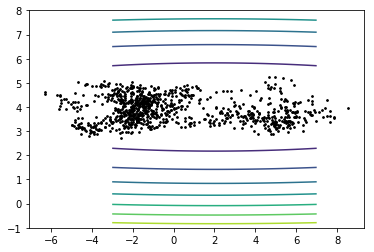

In [98]:

plot_contours()
for i, (sample, acc) in enumerate(chain[len(chain)//10:]):
    if acc and i%10==0:
#         print(sample)
#         print(x, y)
        x, y = sample[0][0][0], sample[0][1][0]
        plt.scatter(x, y, color='k', s=3)

# printing means
x_mean = np.mean([sample[0][0][0] for sample, acc in chain[len(chain)//10:] if acc])
y_mean = np.mean([sample[0][1][0] for sample, acc in chain[len(chain)//10:] if acc]) 
print('x_mean={}, y_mean={}'.format(x_mean, y_mean))

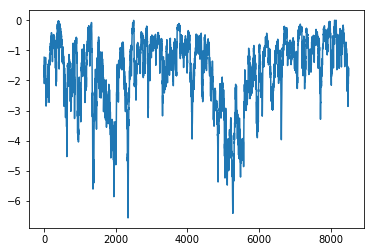

In [94]:
plt.plot(logp_array[3500:])